# 101 Pandas Exercises for Data Analysis

## Index
#### 51. How to get the row number of the nth largest value in a column?
#### 52. How to find the nth largest value greater than a given value?
#### 53. How to get the last n rows of a dataframe with row sum > 100?
#### 54. How to find and cap outliers from a series or dataframe column?
#### 55. How to reshape a dataframe to the largest possible square after removing the negative values?
#### 56. How to swap two rows of a dataframe?
#### 57. How to reverse the rows of a dataframe?
#### 58. How to create one-hot encodings of a categorical variable (dummy variables)?
#### 59. Which column contains the highest number of row-wise maximum values?
#### 60. How to create a new column that contains the row number of nearest column by euclidean distance?


## 51. How to get the row number of the nth largest value in a column?

In [2]:
import pandas as pd
import numpy as np


In [32]:
#Find the row position of the 5th largest value of column 'Price' in df.

df = pd.read_csv('Cars93_miss.csv')
df.tail(12)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
81,Subaru,Legacy,Compact,16.3,19.5,22.7,23.0,30.0,Driver only,4WD,...,5.0,179.0,102.0,67.0,37.0,27.0,14.0,3085.0,non-USA,Subaru Legacy
82,Suzuki,Swift,NaN,7.3,8.6,NaN,39.0,43.0,None,Front,...,4.0,161.0,93.0,NaN,34.0,27.5,10.0,1965.0,non-USA,Suzuki Swift
83,Toyota,Tercel,Small,NaN,9.8,11.8,32.0,37.0,Driver only,Front,...,NaN,162.0,94.0,NaN,36.0,24.0,11.0,2055.0,non-USA,Toyota Tercel
84,Toyota,Celica,Sporty,14.2,18.4,22.6,25.0,32.0,NaN,Front,...,4.0,174.0,99.0,69.0,NaN,23.0,13.0,2950.0,non-USA,Toyota Celica
85,Toyota,Camry,Midsize,15.2,NaN,21.2,22.0,29.0,Driver only,NaN,...,5.0,188.0,103.0,70.0,38.0,28.5,15.0,3030.0,non-USA,Toyota Camry
86,Toyota,Previa,Van,NaN,22.7,26.6,18.0,22.0,Driver only,4WD,...,7.0,187.0,113.0,71.0,41.0,35.0,NaN,3785.0,non-USA,Toyota Previa
87,Volkswagen,Fox,Small,8.7,9.1,9.5,25.0,33.0,None,Front,...,4.0,163.0,93.0,63.0,34.0,26.0,10.0,2240.0,non-USA,Volkswagen Fox
88,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17.0,21.0,None,Front,...,7.0,187.0,115.0,72.0,38.0,34.0,NaN,3960.0,NaN,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,17.6,20.0,22.4,21.0,30.0,None,Front,...,5.0,180.0,103.0,67.0,35.0,31.5,14.0,2985.0,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18.0,25.0,None,Front,...,4.0,159.0,97.0,66.0,36.0,26.0,15.0,2810.0,non-USA,Volkswagen Corrado


In [37]:
# Solution
a = df['Price'].sort_values(ascending = False)
a.head()

58    61.9
47    47.9
10    40.1
18    38.0
3     37.7
Name: Price, dtype: float64

In [39]:
n = 5  #5th largest value

a.index[n-1]

3

In [41]:
# 5th largest value of column Price

df['Price'].sort_values(ascending = False).index[4]

3

## 52. How to find the nth largest value greater than a given value?

In [96]:
# In ser, find 2nd largest value greater than the mean.

ser = pd.Series(np.random.randint(1, 100, 15))
ser

0     81
1     29
2     87
3     42
4     40
5     10
6      9
7     30
8     70
9     20
10    47
11    54
12    81
13    48
14    62
dtype: int32

In [97]:
# Solution 1
ser.mean()

47.333333333333336

In [98]:
up = []
j = 0
index = []
for i, j in enumerate(ser):
    if j > ser.mean():
        index.append(j)
        up.append(i)
            
#up.sort()
print(up)
print(index)
new = dict(zip(up, index))
new

[0, 2, 8, 11, 12, 13, 14]
[81, 87, 70, 54, 81, 48, 62]


{0: 81, 2: 87, 8: 70, 11: 54, 12: 81, 13: 48, 14: 62}

In [99]:
# Solution 2
print('ser: ', ser.sort_values().tolist(), 'mean: ', round(ser.mean()))
ser.sort_values() > ser.mean()

ser:  [9, 10, 20, 29, 30, 40, 42, 47, 48, 54, 62, 70, 81, 81, 87] mean:  47


6     False
5     False
9     False
1     False
7     False
4     False
3     False
10    False
13     True
11     True
14     True
8      True
0      True
12     True
2      True
dtype: bool

In [100]:
np.argwhere(ser.sort_values() > ser.mean())

array([[ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14]], dtype=int64)

In [101]:
np.argwhere(ser.sort_values() > ser.mean())[1]

array([9], dtype=int64)

In [103]:
ser.sort_values().tolist()

[9, 10, 20, 29, 30, 40, 42, 47, 48, 54, 62, 70, 81, 81, 87]

## 53. How to get the last n rows of a dataframe with row sum > 100?

In [144]:
df = pd.DataFrame(np.random.randint(10, 40, 60).reshape(-1, 4))
df

,0,1,2,3
0,13,37,37,37
1,16,26,21,11
2,31,33,19,19
3,23,31,29,17
4,11,13,14,11
5,19,30,37,28
6,34,32,28,18
7,12,36,33,17
8,14,29,35,29
9,22,28,30,23


In [145]:
df.sum(axis = 1)


0     124
1      74
2     102
3     100
4      49
5     114
6     112
7      98
8     107
9     103
10     86
11     93
12    119
13    119
14     71
dtype: int64

In [146]:
df[df.sum(axis = 1) > 100][-2:]

,0,1,2,3
12,29,33,39,18
13,39,32,36,12


In [147]:
# print row sums
rowsums = df.apply(np.sum, axis=1)
rowsums

0     124
1      74
2     102
3     100
4      49
5     114
6     112
7      98
8     107
9     103
10     86
11     93
12    119
13    119
14     71
dtype: int64

In [148]:
last_two_rows = df.iloc[np.where(rowsums > 100)[0][-2:], :]
last_two_rows 

,0,1,2,3
12,29,33,39,18
13,39,32,36,12


## 54. How to find and cap outliers from a series or dataframe column?

In [150]:
df = pd.read_csv('Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


In [195]:
df.shape

(93, 27)

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Min.Price,86.0,17.118605,8.828290,6.7,10.825,14.60,20.250,45.4
Price,91.0,19.616484,9.724280,7.4,12.350,17.70,23.500,61.9
Max.Price,88.0,21.459091,10.696563,7.9,14.575,19.15,24.825,80.0
MPG.city,84.0,22.404762,5.841520,15.0,18.000,21.00,25.000,46.0
MPG.highway,91.0,29.065934,5.370293,20.0,26.000,28.00,31.000,50.0
EngineSize,91.0,2.658242,1.045845,1.0,1.800,2.30,3.250,5.7
Horsepower,86.0,144.000000,53.455204,55.0,100.750,140.00,170.000,300.0
RPM,90.0,5276.666667,605.554811,3800.0,4800.000,5200.00,5787.500,6500.0
Rev.per.mile,87.0,2355.000000,486.916616,1320.0,2017.500,2360.00,2565.000,3755.0
Fuel.tank.capacity,85.0,16.683529,3.375748,9.2,14.500,16.50,19.000,27.0


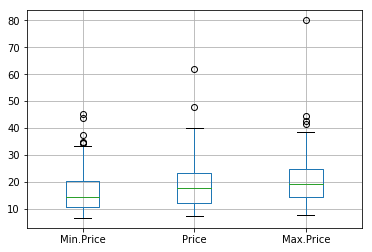

In [156]:
df.boxplot(column = ['Min.Price', 'Price', 'Max.Price'])
plt.show()

In [189]:
new_df = df[(df['Min.Price'] < 40) & (df['Price'] < 40) & (df['Max.Price'] < 40)]
new_df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
5,Buick,Century,Midsize,14.2,15.7,17.3,22.0,31.0,Driver only,NaN,...,6.0,189.0,105.0,69.0,41.0,28.0,16.0,NaN,USA,Buick Century
7,Buick,Roadmaster,Large,22.6,23.7,24.9,16.0,25.0,Driver only,Rear,...,6.0,216.0,116.0,78.0,45.0,30.5,21.0,4105.0,USA,Buick Roadmaster


In [194]:
new_df.shape

(77, 27)

In [190]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Min.Price,77.0,16.063636,7.351994,6.7,10.80,14.3,19.50,34.7
Price,77.0,18.106494,7.408127,7.4,12.20,16.3,20.90,36.1
Max.Price,77.0,20.150649,7.840241,7.9,14.70,18.6,23.50,38.7
MPG.city,69.0,22.550725,5.663444,15.0,18.00,21.0,25.00,46.0
MPG.highway,75.0,29.080000,5.018237,20.0,26.00,28.0,31.00,50.0
EngineSize,76.0,2.581579,0.987753,1.0,1.80,2.3,3.00,5.7
Horsepower,71.0,138.323944,45.248133,55.0,101.50,140.0,169.00,300.0
RPM,74.0,5235.135135,632.495045,3800.0,4800.00,5200.0,5737.50,6500.0
Rev.per.mile,72.0,2347.777778,472.783106,1320.0,2060.00,2375.0,2572.50,3755.0
Fuel.tank.capacity,70.0,16.444286,3.267922,9.2,14.50,16.0,18.50,27.0


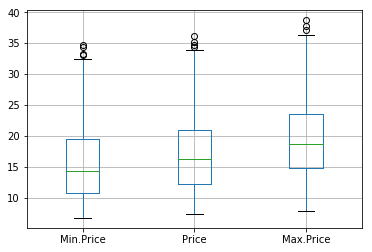

In [191]:
new_df.boxplot(column = ['Min.Price', 'Price', 'Max.Price'])
plt.show()

In [192]:
# Input
ser = pd.Series(np.logspace(-2, 2, 30))

# Solution
def cap_outliers(ser, low_perc, high_perc):
    low, high = ser.quantile([low_perc, high_perc])
    print(low_perc, '%ile: ', low, '|', high_perc, '%ile: ', high)
    ser[ser < low] = low
    ser[ser > high] = high
    return(ser)

capped_ser = cap_outliers(ser, .05, .95)

0.05 %ile:  0.016049294076965887 | 0.95 %ile:  63.876672220183934


## 55. How to reshape a dataframe to the largest possible square after removing the negative values?

In [247]:
df = pd.DataFrame(np.random.randint(-20, 50, 100).reshape(10,-1))
df

,0,1,2,3,4,5,6,7,8,9
0,25,-17,13,26,43,19,-2,33,37,-13
1,1,-4,-7,1,6,2,3,41,-20,8
2,43,43,-20,48,-8,41,28,9,-14,-11
3,12,-10,14,29,32,1,38,-3,-2,-16
4,19,35,5,-5,43,13,13,20,39,25
5,4,28,-10,45,15,12,25,49,15,30
6,26,-17,24,-1,19,9,8,-6,20,36
7,0,38,-18,34,31,27,17,9,-17,-20
8,-18,27,6,45,36,-13,5,-7,38,19
9,32,-6,5,33,30,48,25,40,20,4


In [248]:
arr = df[df[df.columns] > 0]
arr

,0,1,2,3,4,5,6,7,8,9
0,25.0,NaN,13.0,26.0,43.0,19.0,NaN,33.0,37.0,NaN
1,1.0,NaN,NaN,1.0,6.0,2.0,3.0,41.0,NaN,8.0
2,43.0,43.0,NaN,48.0,NaN,41.0,28.0,9.0,NaN,NaN
3,12.0,NaN,14.0,29.0,32.0,1.0,38.0,NaN,NaN,NaN
4,19.0,35.0,5.0,NaN,43.0,13.0,13.0,20.0,39.0,25.0
5,4.0,28.0,NaN,45.0,15.0,12.0,25.0,49.0,15.0,30.0
6,26.0,NaN,24.0,NaN,19.0,9.0,8.0,NaN,20.0,36.0
7,NaN,38.0,NaN,34.0,31.0,27.0,17.0,9.0,NaN,NaN
8,NaN,27.0,6.0,45.0,36.0,NaN,5.0,NaN,38.0,19.0
9,32.0,NaN,5.0,33.0,30.0,48.0,25.0,40.0,20.0,4.0


In [256]:
# Step 1: remove negative values from arr
arr = df[df > 0].values.flatten()
arr_qualified = arr[~np.isnan(arr)]

In [258]:
# Step 2: find side-length of largest possible square
n = int(np.floor(y.shape[0]**.5))
n

8

In [259]:
# Step 3: Take top n^2 items without changing positions
top_indexes = np.argsort(arr_qualified)[::-1]
output = np.take(arr_qualified, sorted(top_indexes[:n**2])).reshape(n, -1)
print(output)

[[25. 13. 26. 43. 19. 33. 37.  6.]
 [41.  8. 43. 43. 48. 41. 28.  9.]
 [12. 14. 29. 32. 38. 19. 35. 43.]
 [13. 13. 20. 39. 25. 28. 45. 15.]
 [12. 25. 49. 15. 30. 26. 24. 19.]
 [ 9.  8. 20. 36. 38. 34. 31. 27.]
 [17.  9. 27.  6. 45. 36.  5. 38.]
 [19. 32. 33. 30. 48. 25. 40. 20.]]


## 56. How to swap two rows of a dataframe?

In [277]:
df = pd.read_csv('Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


In [272]:
# Solution
def swap_rows(df, i1, i2):
    a, b = df.iloc[i1, :].copy(), df.iloc[i2, :].copy()
    df.iloc[i1, :], df.iloc[i2, :] = b, a
    return df

In [273]:
swap_rows(df, 1, 2).head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
2,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


##  57. How to reverse the rows of a dataframe?

In [274]:
df = pd.DataFrame(np.arange(25).reshape(5, -1))
df


,0,1,2,3,4
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [275]:
# Solution 1
df.iloc[::-1, :]


,0,1,2,3,4
4,20,21,22,23,24
3,15,16,17,18,19
2,10,11,12,13,14
1,5,6,7,8,9
0,0,1,2,3,4


In [276]:
# Solution 2
print(df.loc[df.index[::-1], :])

    0   1   2   3   4
4  20  21  22  23  24
3  15  16  17  18  19
2  10  11  12  13  14
1   5   6   7   8   9
0   0   1   2   3   4


## 58. How to create one-hot encodings of a categorical variable (dummy variables)?

In [290]:
df = pd.DataFrame(np.arange(25).reshape(5,-1), columns=list('abcde'))
df

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19
4,20,21,22,23,24


In [291]:
df_onehot = pd.concat([pd.get_dummies(df['a']), df[list('bcde')]], axis=1)
print(df_onehot)

   0  5  10  15  20   b   c   d   e
0  1  0   0   0   0   1   2   3   4
1  0  1   0   0   0   6   7   8   9
2  0  0   1   0   0  11  12  13  14
3  0  0   0   1   0  16  17  18  19
4  0  0   0   0   1  21  22  23  24


In [278]:
df = pd.read_csv('Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


In [288]:
x = df.iloc[:, 25:26]
x.head()


,Origin
0,non-USA
1,non-USA
2,non-USA
3,non-USA
4,non-USA


In [289]:
pd.get_dummies(x)#, drop_first=True)

,Origin_USA,Origin_non-USA
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


## 59. Which column contains the highest number of row-wise maximum values?

In [320]:
df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1))
df

,0,1,2,3
0,71,41,86,87
1,4,97,60,80
2,12,52,41,62
3,27,59,31,87
4,36,90,36,93
5,7,23,13,80
6,43,10,2,31
7,99,73,81,30
8,74,13,60,69
9,48,2,59,16


In [322]:
print('Column index with highest row maxes: ', df.apply(np.argmax, axis=1).value_counts().index[0])

Column index with highest row maxes:  3


D:\Program_Files\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


## 60. How to create a new column that contains the row number of nearest column by euclidean distance?

In [323]:
df = pd.DataFrame(np.random.randint(1,100, 40).reshape(10, -1), columns=list('pqrs'), index=list('abcdefghij'))
df

,p,q,r,s
a,52,48,3,13
b,76,46,82,11
c,61,92,44,93
d,53,11,82,7
e,80,17,67,78
f,22,22,13,52
g,32,24,44,12
h,43,39,33,49
i,1,67,95,28
j,63,69,30,38
